<a href="https://colab.research.google.com/github/Shiva-Chakravarthy-Gollapudi/info5502-spring2022/blob/main/lab_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [4]:
# Your answer here (code + explanation):


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from pathlib import Path
import cv2
from pathlib import Path
from PIL import Image
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from zipfile import ZipFile


import os
import glob as gb


In [ ]:
!unzip /content/preprocessed_cases.zip

In [7]:
APP_FOLDER = '/content/preprocessed_cases[cases_29404]'
totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(APP_FOLDER):
    
    for directories in dirs:
        totalDir += 1
    print('files in each category',base,":", len(files))

    for Files in files:
        totalFiles += 1
print('Total number of categories: ', totalDir)
print('Total number of documents: ', totalFiles)

files in each category /content/preprocessed_cases[cases_29404] : 0
files in each category /content/preprocessed_cases[cases_29404]/32 : 118
files in each category /content/preprocessed_cases[cases_29404]/7 : 621
files in each category /content/preprocessed_cases[cases_29404]/51 : 225
files in each category /content/preprocessed_cases[cases_29404]/62 : 218
files in each category /content/preprocessed_cases[cases_29404]/67 : 356
files in each category /content/preprocessed_cases[cases_29404]/11 : 605
files in each category /content/preprocessed_cases[cases_29404]/25 : 244
files in each category /content/preprocessed_cases[cases_29404]/38 : 503
files in each category /content/preprocessed_cases[cases_29404]/60 : 42
files in each category /content/preprocessed_cases[cases_29404]/17 : 125
files in each category /content/preprocessed_cases[cases_29404]/4 : 231
files in each category /content/preprocessed_cases[cases_29404]/13 : 458
files in each category /content/preprocessed_cases[cases_29

In [10]:
#3)

path = os.listdir("/content/preprocessed_cases[cases_29404]")


sum = 0
for i in path:
    #print(i)
    docs = os.listdir("/content/preprocessed_cases[cases_29404]/{}".format((i)))
    #print(docs)
    try:
        for file in docs:
            filepath = os.path.join("/content/preprocessed_cases[cases_29404]", i, file)
            data = pd.read_csv(filepath, sep="\t")
            sum += data.shape[0]
        #print(sum)
    except:
        print(i, file)
          
print("The average no of sentences in all categories is:", round(sum/78, 2))
print("The average no of sentences in all files is:", round(sum/29404, 2))

60 case0.txt
The average no of sentences in all categories is: 16772.28
The average no of sentences in all files is: 44.49


In [ ]:
!pip install stop_words

In [ ]:
#5)
import re
import pandas as pd
from stop_words import get_stop_words
from nltk.corpus import stopwords
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

# creating a set of stop words that are obtained from STOPWORDS and stop_words
STOPWORDS = set(stopwords.words('english'))
stop_words = list(get_stop_words('en'))
# we combien both sets of stopwords to make a corpus of stopwords
stopwords = list(set(list(STOPWORDS)) | set(list(stop_words)))
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]
print(len(stopwords))
import os

list_of_words = []
path = os.listdir("/content/preprocessed_cases[cases_29404]")
# we loop through each file and create a list of words
for folder in path:
    docs = os.listdir("/content/preprocessed_cases[cases_29404]/{}".format((folder)))
    try:
        for file in docs:
            filepath = os.path.join("/content/preprocessed_cases[cases_29404]", folder, file)
            
            data = pd.read_csv(filepath, sep="\t")
            for col in data.columns:
                data[col] = data[col].str.lower()
                data[col] = data[col].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x))
                data[col] = data[col].apply(lambda x: " ".join(item for item in x.split() if ((item not in stopwords) and (len(item)!= 1))))
                
                for sent in data[col]:
                    list_of_words.extend(sent.split())
       
    except Exception as e:
        print(e)

In [14]:
from collections import Counter
# we get the top 50 unique terms and their count
(Counter(list_of_words).most_common(50))

[('court', 916102),
 ('district', 369278),
 ('state', 239755),
 ('also', 219423),
 ('evidence', 191507),
 ('whether', 188675),
 ('may', 181439),
 ('law', 170088),
 ('states', 159082),
 ('must', 157488),
 ('claim', 155550),
 ('case', 155090),
 ('federal', 153722),
 ('trial', 143626),
 ('united', 142180),
 ('claims', 139867),
 ('one', 135028),
 ('judgment', 131722),
 ('action', 128021),
 ('order', 125660),
 ('first', 120900),
 ('government', 119460),
 ('section', 114909),
 ('defendant', 112806),
 ('act', 112041),
 ('review', 109941),
 ('issue', 108065),
 ('two', 107779),
 ('motion', 106467),
 ('rule', 105693),
 ('decision', 104967),
 ('new', 104195),
 ('time', 101820),
 ('plaintiff', 100272),
 ('plaintiffs', 97704),
 ('filed', 93794),
 ('public', 93556),
 ('made', 92294),
 ('statute', 91646),
 ('jury', 90679),
 ('right', 89590),
 ('defendants', 86711),
 ('found', 86242),
 ('parties', 85984),
 ('held', 85549),
 ('supreme', 84870),
 ('use', 82990),
 ('within', 79342),
 ('based', 79115),
 (

In [15]:

from collections import Counter
counter_list = (Counter(list_of_words).most_common(50))


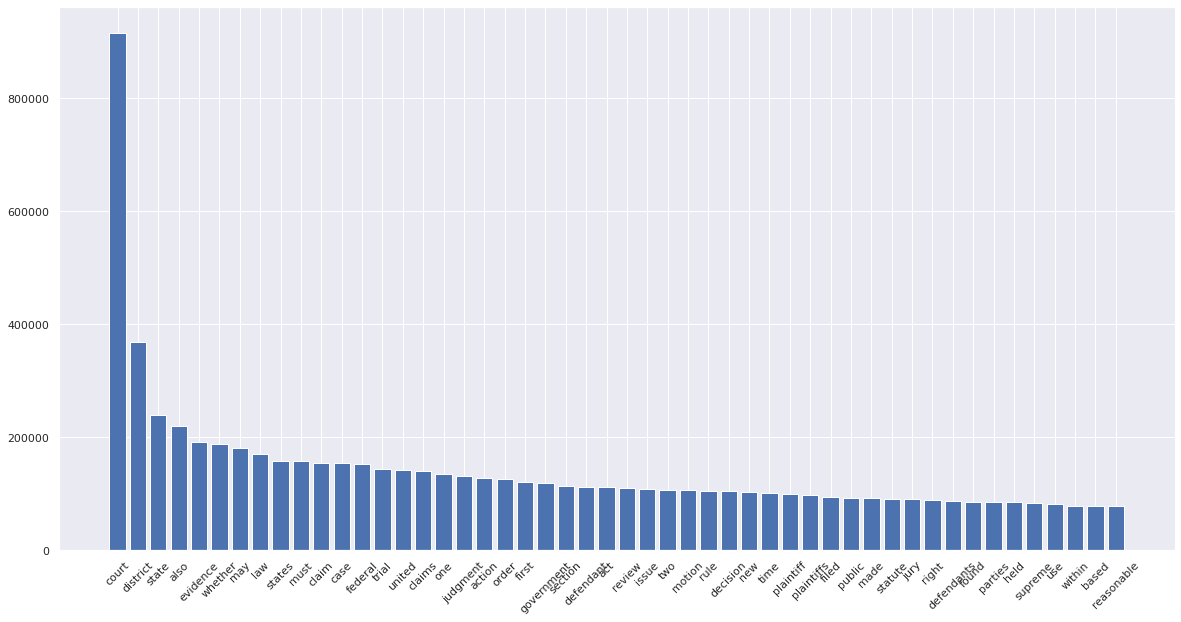

In [17]:

import seaborn as sns

sns.set(rc = {'figure.figsize':(20,10)})
plt.bar(dict(counter_list).keys(), dict(counter_list).values())
plt.xticks(rotation =45)
plt.show()
#dict(counter_list).keys()

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

![heatmap.png](attachment:heatmap.png)

In [19]:
# 1.)
import pandas as pd
df=pd.read_excel("Student_Performance.xlsx")
# we loop through each file and print the following details
for col in df.columns:
    print("Column:",col)
    print("The no of rows are:", df[col].shape[0])
    print("The no of unique values in this column are:", df[col].value_counts().shape[0])
    print(df[col].value_counts())
    print()

Column: ge
The no of rows are: 131
The no of unique values in this column are: 2
M    72
F    59
Name: ge, dtype: int64

Column: cst
The no of rows are: 131
The no of unique values in this column are: 5
OBC     57
G       44
ST      20
MOBC     6
SC       4
Name: cst, dtype: int64

Column: tnp
The no of rows are: 131
The no of unique values in this column are: 4
Good    59
Vg      38
Pass    25
Best     9
Name: tnp, dtype: int64

Column: twp
The no of rows are: 131
The no of unique values in this column are: 4
Good    65
Vg      44
Pass    17
Best     5
Name: twp, dtype: int64

Column: iap
The no of rows are: 131
The no of unique values in this column are: 4
Vg      63
Good    53
Best     8
Pass     7
Name: iap, dtype: int64

Column: esp
The no of rows are: 131
The no of unique values in this column are: 4
Good    54
Vg      42
Pass    27
Best     8
Name: esp, dtype: int64

Column: arr
The no of rows are: 131
The no of unique values in this column are: 2
N    78
Y    53
Name: arr, dtyp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


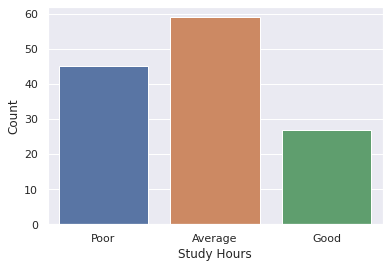

In [20]:
# 2.)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df['sh'])
plt.xlabel("Study Hours")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


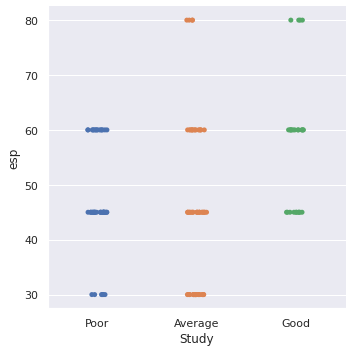

In [21]:
# 3.)
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
df1 = pd.DataFrame()
df1['Study']=pd.DataFrame(df.sh)
df1['esp']=pd.DataFrame(df.esp)
df1['esp'].mask(df1['esp'] == 'Best', 80, inplace=True)
df1['esp'].mask(df1['esp'] == 'Vg', 60, inplace=True)
df1['esp'].mask(df1['esp'] == 'Good', 45, inplace=True)
df1['esp'].mask(df1['esp'] == 'Pass', 30, inplace=True)
df1['esp'].mask(df1['esp'] == 'Fail', 30, inplace=True)
df1['exampercent']=pd.DataFrame(df.esp)
sns.factorplot(x='Study',y='esp', kind = 'strip',data=df1)
plt.show()

Error encoding fq
Error encoding mq


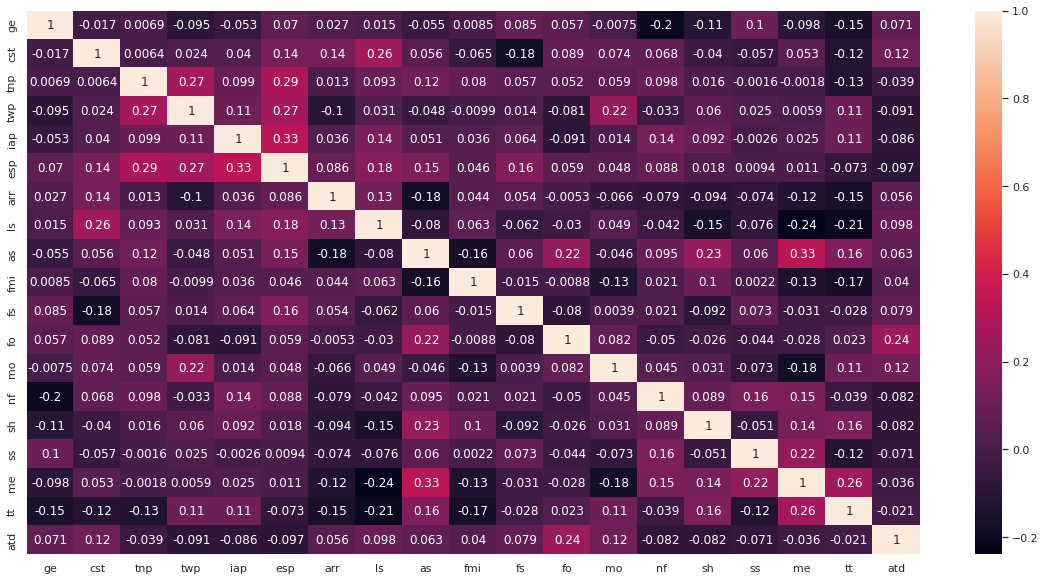

In [22]:
# 4.)
# Import label encoder 
from sklearn import preprocessing
import seaborn as sns
label_encoder = preprocessing.LabelEncoder()  
def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = preprocessing.LabelEncoder()
    # we convert categorical columns data into numerical data
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

df1 = Encoder(df)
# we drop the ms column
df1 = df1.drop('ms', axis = 1)

# we get the correlation data
corr = df1.corr()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(corr,annot=True)
plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [ ]:
# Your three questions:

'''
Please list your questions here:

Selected Heart attack analysis. 
This data is collected from the cardiologist. The main purpose of this dataset is to build a machine learning model 
to predict the the risk of a heart attack based on a patient's health condition.

The dataset includes information about 303 patients.
There are 13 features. Even though 12 of them are integer type, only 6 are really numerical, the rest are categorical.
The target is output. 0 is low risk patient, 1 is high risk patient.
There are no missing values.

1. By Removing the duplicate columns and Check the outliners for Quantitative data using 
   suitable visualisations?
2. Check the Count of the data in each columns of categorical data using suitable visualisation?
3. Find the corelarion of all the numerical feature and the target?


'''

'\nPlease list your questions here:\n\n\n\n\n\n'

In [ ]:
# You code to answer the three questions (Please add comments in the code):

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

heartdb = pd.read_csv('/content/heart.csv')
heartdb.head(3)

if heartdb.duplicated().sum() > 0:
    print("The dataset contains",heartdb.duplicated().sum(),"duplicated rows")
else:
    print("No duplicated rows in the dataset")

heartdb.drop_duplicates(keep='first', inplace = True) 
# Removing the duplicated row. "keep='first'" means that 
# python will keep the first duplicated row and remove the other

The dataset contains 1 duplicated rows


In [ ]:
heartdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
# To check the missing/Null values in thd dataset
heartdb.isnull().sum(0) # No null values in the data

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
heartdb.rename(columns={"age": "Age", "sex": "Sex", 'cp': 'Chest_Pain_Type', 
                        'trtbps': 'Resting_Blood_Pressure', 'thalachh': 'Max_Heart_Rate', 
                        'fbs':'Fasting_Blood_Sugar', 'output':'Target', 'chol':'Cholesterol', 
                        'restecg':'Electrocardiographic_Results', 'exng':'Exercise_Induced_Angina', 
                        'oldpeak':'Previous_Peak', 'slp':'Slope', 'caa':'No_Major_Vessels', 'thall':'Thal_Rate'}, inplace=True)
heartdb.head(3)

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Electrocardiographic_Results,Max_Heart_Rate,Exercise_Induced_Angina,Previous_Peak,Slope,No_Major_Vessels,Thal_Rate,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
heartdb[['Age', 'Resting_Blood_Pressure', 'Cholesterol', 'Max_Heart_Rate', 'Previous_Peak']].describe()

,Age,Resting_Blood_Pressure,Cholesterol,Max_Heart_Rate,Previous_Peak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


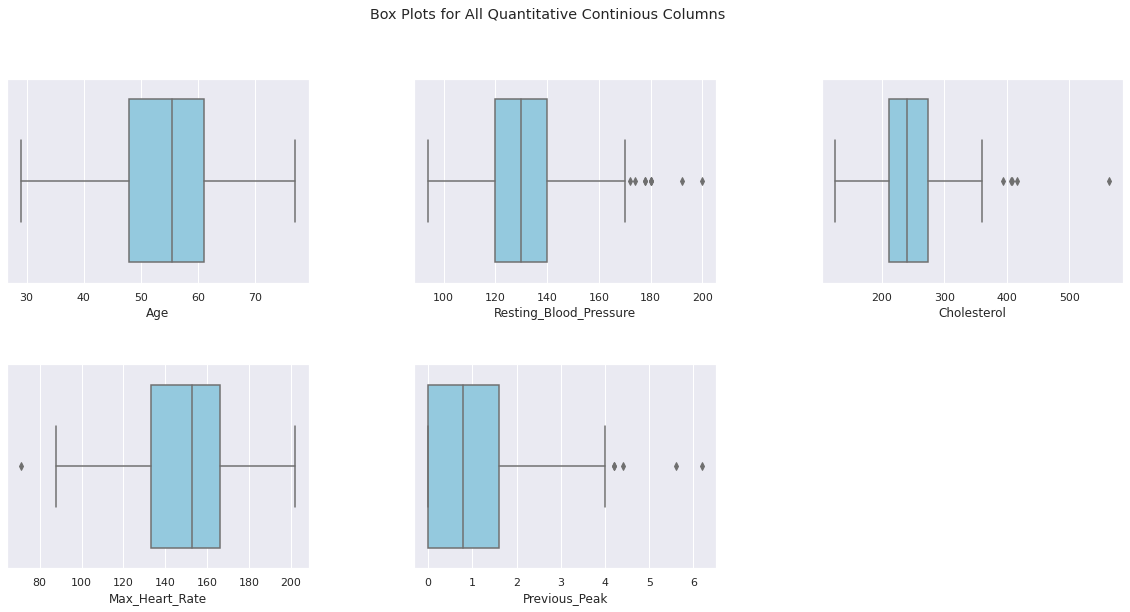

In [ ]:
columns = ['Age', 'Resting_Blood_Pressure', 'Cholesterol', 'Max_Heart_Rate', 'Previous_Peak']

plt.figure(figsize=(20,10))

for n, column in enumerate(columns):
    ax = plt.subplot(2, 3, n + 1)
    sns.boxplot(data = heartdb, x = column, color='skyblue')
    sns.set(style="darkgrid")
     
plt.suptitle("Box Plots for All Quantitative Continious Columns")
plt.subplots_adjust(wspace=0.35, bottom=0.2, hspace=0.4)
sns.set(style="darkgrid")
plt.show()



The dataset contains columns with outliers. The number of outliers are small. The box plots show tht the distribution of the data is quite good (except for "Previous Peak"). The IRQ (Interquartile Range, the 50% of the data is quite in the middle most of the times). Although this indicates the distribution of each column, let's also plot the same columns but this time as a distribution plot and see the skews

In [ ]:
# Category representation

heartdb['Sex'].replace({1:'Male', 0:'Female'}, inplace = True)
heartdb['Chest_Pain_Type'].replace({0:'Typical Angina', 1:'Atypical Angina', 2:'Non-Anginal Pain', 3:'Asymptomatic'}, inplace = True)
heartdb['Electrocardiographic_Results'].replace({0:'Normal', 1:'ST-T Abnormality', 2:'Ventricular Hypertrophy'}, inplace = True)
heartdb['Slope'].replace({0:'Upsloping', 1:'Flat', 2:'Downsloping'}, inplace = True)

heartdb.head(3)

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol,Fasting_Blood_Sugar,Electrocardiographic_Results,Max_Heart_Rate,Exercise_Induced_Angina,Previous_Peak,Slope,No_Major_Vessels,Thal_Rate,Target
0,63,Male,Asymptomatic,145,233,1,Normal,150,0,2.3,Upsloping,0,1,1
1,37,Male,Non-Anginal Pain,130,250,0,ST-T Abnormality,187,0,3.5,Upsloping,0,2,1
2,41,Female,Atypical Angina,130,204,0,Normal,172,0,1.4,Downsloping,0,2,1


Replacing the Sex column with male when it is 1 and female with it is 0
and slope column, upsloping when it is 0, flat when it is 1 and 2 downsloping. Similarly change the columns ECG and Chestpain columns


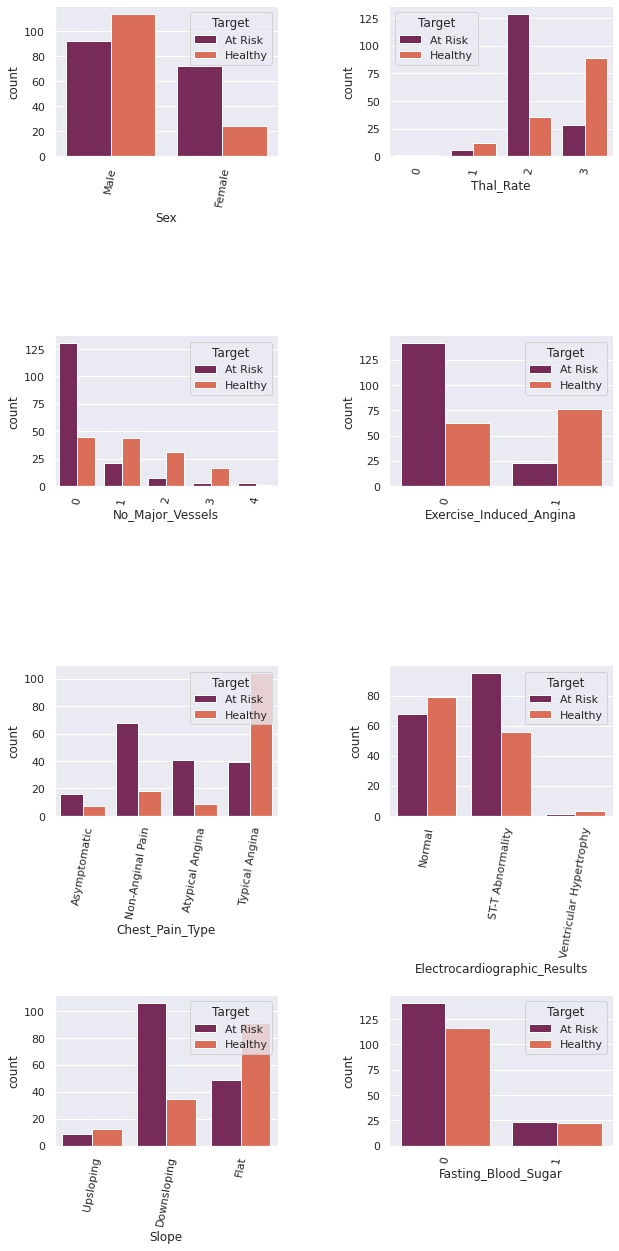

In [ ]:
heartdb['Target'].replace({0:'Healthy', 1:'At Risk'}, inplace = True)
columns = ['Sex', 'Thal_Rate', 'No_Major_Vessels', 'Exercise_Induced_Angina', 'Chest_Pain_Type', 'Electrocardiographic_Results', 'Slope', 'Fasting_Blood_Sugar']

plt.figure(figsize=(10,30))

for n, column in enumerate(columns):
    ax = plt.subplot(5, 2, n + 1)
    sns.countplot(data=heartdb, x=column, hue='Target', palette='rocket')
    plt.xticks(rotation=80)

    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)
    
plt.subplots_adjust(wspace=0.50, hspace=1.2, bottom=0.2)
plt.show()

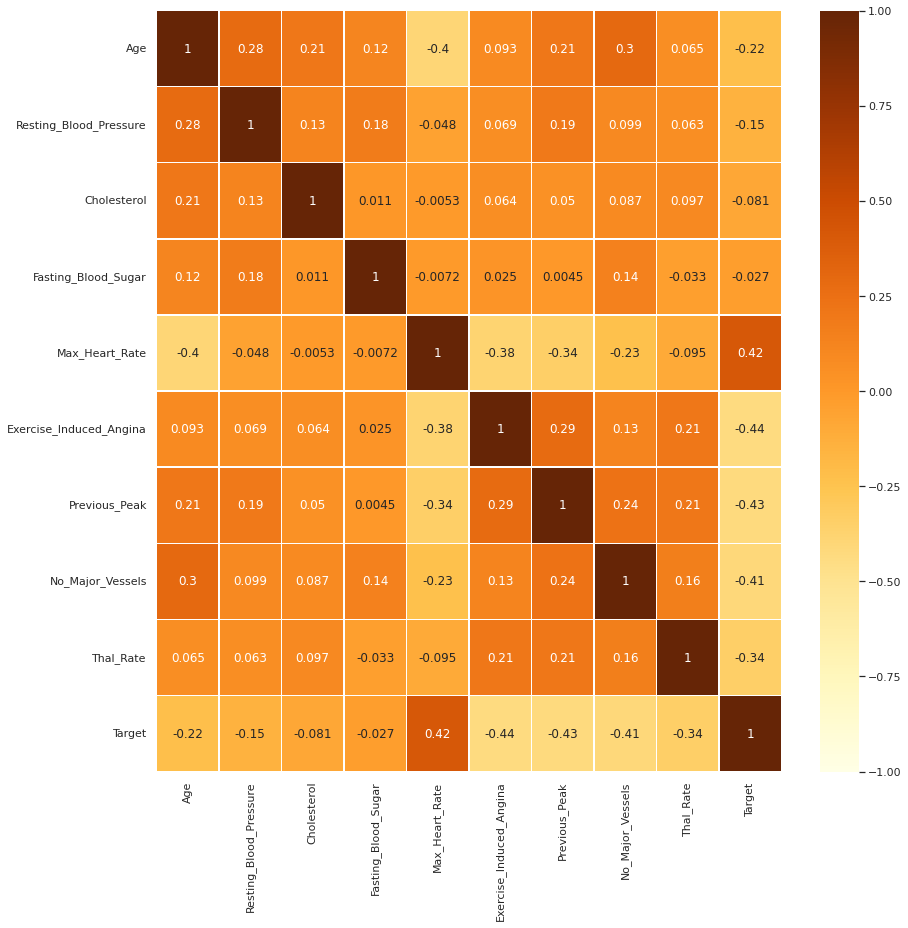

In [ ]:
#3)

f,ax=plt.subplots(figsize = (14,14))
sns.heatmap(heartdb.corr(),annot= True,cmap='YlOrBr',annot_kws={"size": 12} ,vmin = -1,ax=ax, vmax = 1, linewidth = 0.4,)
plt.show();

Maximum heart rate, Previous peak has the good positive relation with target

Exercise induced angina, Thal_rate has the best negative relation with target.

Output and maximum heart rate achieved(thalachh) are having good positive relation with
chest pain variable.

There is a weak negative relationship between age, cholesterol(chol) and resting blood
pressure with respect to sex.